## HeLa Overview
Here we take a look at the HeLa cell runs. 

In [1]:
import load_data
#data_raw = load_data.load_FragPipe(month="HeLaforPRIDE", contains =[], level='peptide', suffix="Spectral Count")
version="txtMQ1.6.17.0"
data_raw = load_data.load_max_quant(version=version, level='peptides',prefix="Identification type",
                                    sample_type="HeLa")#prepended to sample names

In [2]:
data_raw

,HeLa_0cell_B16,HeLa_0cell_B18,HeLa_0cell_B4,HeLa_10cell_G4,HeLa_10cell_G8,HeLa_10cell_H2,HeLa_150cell_I12,HeLa_150cell_I16,HeLa_150cell_I18,HeLa_1cell_E12,HeLa_1cell_E14,HeLa_1cell_F8,HeLa_500cell_J5,HeLa_500cell_K16,HeLa_500cell_K8
Sequence,,,,,,,,,,,,,,,
AAAAAAAAAAGAAGGR,NaN,NaN,NaN,By MS/MS,By MS/MS,NaN,By MS/MS,NaN,By MS/MS,NaN,NaN,NaN,By MS/MS,By MS/MS,By MS/MS
AAAAAAAAAAGAAGGRGSGPGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,By MS/MS,NaN,NaN
AAAAAAAAAPAAAATAPTTAATTAATAAQ,NaN,NaN,NaN,By MS/MS,By MS/MS,NaN,By MS/MS,By MS/MS,By MS/MS,NaN,NaN,NaN,By MS/MS,By MS/MS,By MS/MS
AAAAAAAGDSDSWDADAFSVEDPVRK,NaN,NaN,NaN,NaN,NaN,By MS/MS,By MS/MS,By MS/MS,By MS/MS,NaN,NaN,NaN,By MS/MS,By MS/MS,By MS/MS
AAAAAAALQAK,NaN,NaN,NaN,By MS/MS,By MS/MS,By MS/MS,By MS/MS,By MS/MS,By MS/MS,NaN,NaN,By matching,By MS/MS,By MS/MS,By MS/MS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YYTVFDRDNNRVGFAEAAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,By MS/MS,NaN,NaN,NaN,By MS/MS,By matching,NaN,NaN
YYVTIIDAPGHR,NaN,By matching,NaN,By MS/MS,By MS/MS,By MS/MS,By MS/MS,By MS/MS,By MS/MS,By MS/MS,By MS/MS,By MS/MS,By MS/MS,By MS/MS,By MS/MS
YYVTIIDAPGHRDFIK,NaN,NaN,NaN,By MS/MS,By MS/MS,By MS/MS,By MS/MS,By MS/MS,By MS/MS,NaN,By MS/MS,NaN,By MS/MS,By MS/MS,By MS/MS


Here we load functions that will be used.

In [3]:
import matplotlib.pyplot as plt
from statistics import mean
import math
from numpy import isnan
import seaborn as sns

import numpy as np
import pandas as pd

Now we can get the number of non-zero values in each sample.

In [4]:
data_raw.fillna(0, inplace=True)
#counts = data_raw.apply(np.count_nonzero).sort_values()
counts = data_raw.apply(pd.value_counts)
counts.to_csv('data/AutoPOTS_{0}/peptide_counts.csv'.format(version))
counts

,HeLa_0cell_B16,HeLa_0cell_B18,HeLa_0cell_B4,HeLa_10cell_G4,HeLa_10cell_G8,HeLa_10cell_H2,HeLa_150cell_I12,HeLa_150cell_I16,HeLa_150cell_I18,HeLa_1cell_E12,HeLa_1cell_E14,HeLa_1cell_F8,HeLa_500cell_J5,HeLa_500cell_K16,HeLa_500cell_K8
0,46463,46375,46330,37593,38874,40527,29639,27097,31068,45897,45484,45795,16793,22653,19034
By MS/MS,105,159,223,7543,6407,5458,16309,18476,14112,621,886,615,29149,23578,27361
By matching,53,87,68,1485,1340,636,673,1048,1441,103,251,211,679,390,226


Here we visualized that same data for clarity. 

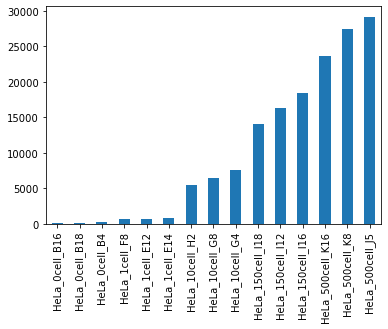

In [5]:
counts.loc["By MS/MS"].sort_values().plot.bar()

To further improve the bar plot, we will assign a color to each type to make the triplicates more distinct.

In [6]:
cell_types = ['_0cell','1cell','10cell','100cell','500cell']
cell_types = ['Sup','10cell','100cell','500cell']
cell_types = ['_0cell','1cell','10cell','150cell','500cell']
colors = ['#0066ff','orange','#0066ff','orange','#0066ff']
samples=np.array(data_raw.columns.values)

color_by_type = []
for cell_type in cell_types:
    cells_of_type = list(s for i,s in enumerate(samples) if cell_type in s)
    print(cell_type, colors[0])
    for c in cells_of_type:
        color_by_type.append(colors[0])
    colors.pop(0)

    

_0cell #0066ff
1cell orange
10cell #0066ff
150cell orange
500cell #0066ff


Replot with colors and labels.

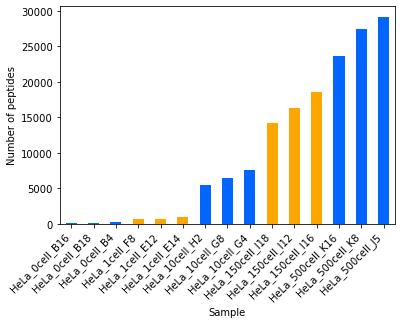

In [7]:
fig = counts.loc["By MS/MS"].sort_values().plot.bar(color=color_by_type)
plt.setp(fig.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.xlabel("Sample")
plt.ylabel("Number of peptides")
#plt.show()
plt.savefig('data/AutoPOTS_{0}/peptide_counts.png'.format(version), dpi=300, bbox_inches='tight')

While 500 cells has the highest number of protein groups identified, there is only a small drop going down to 100 cells and 10 HeLa cells is still fairly high.